In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.cm as cm

import math



%matplotlib inline

In [30]:
URL = r"file:///C:\Users\nakamura\test\result.csv"

In [31]:
import pixiedust
df = pixiedust.sampleData(URL)


Downloaded 724 bytes
Creating pandas DataFrame for 'file:///C:\Users\nakamura\test\result.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'file:///C:\Users\nakamura\test\result.csv'


In [32]:
display(df)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


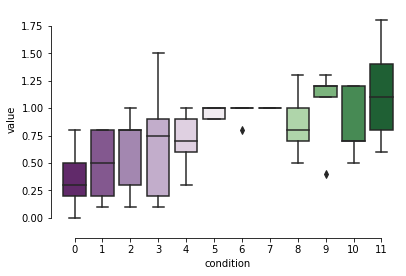

In [38]:
sns.boxplot(x='condition', y="value",data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


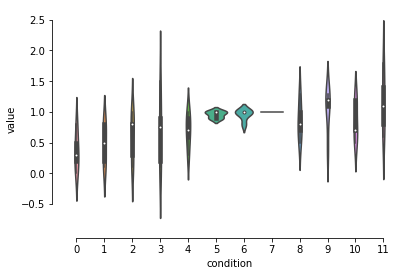

In [40]:
sns.violinplot(x='condition', y="value", data = df, split=True)
sns.despine(offset=10, trim=True)

conditionを面積に変換

In [42]:
condition_l = {0:20,1:20,2:10,3:20,4:40,5:40,6:40,7:40,8:60,9:60,10:60,11:60}
condition_d = {0:40,1:45,2:50,3:55,4:40,5:45,6:50,7:55,8:40,9:45,10:50,11:50}

In [49]:
df.loc[:,"l"] = df.loc[:,"condition"].map(condition_l)
df.loc[:,"d"] = df.loc[:,"condition"].map(condition_d)
df.head()

,subject,condition,value,l,d
0,âè,8,1.3,60,40
1,âè,1,0.8,20,45
2,âè,11,0.6,60,50
3,âè,10,0.5,60,50
4,âè,7,1.0,40,55


In [51]:
df.loc[:,"S"] = df.loc[:,"l"] * df.loc[:,"d"]
df.head()

,subject,condition,value,l,d,S
0,âè,8,1.3,60,40,2400
1,âè,1,0.8,20,45,900
2,âè,11,0.6,60,50,3000
3,âè,10,0.5,60,50,3000
4,âè,7,1.0,40,55,2200



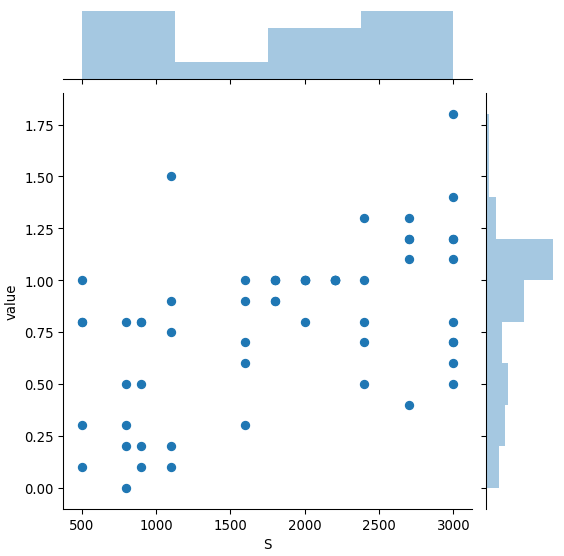

In [52]:
display(df)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


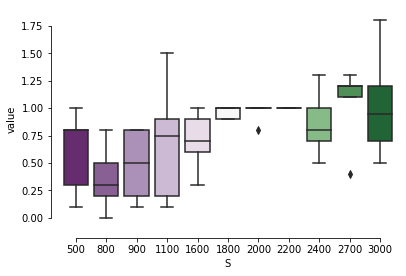

In [54]:
sns.boxplot(x='S', y="value",data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

べき乗則 (感覚値)=c*x^kでフィッティングしてみる

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


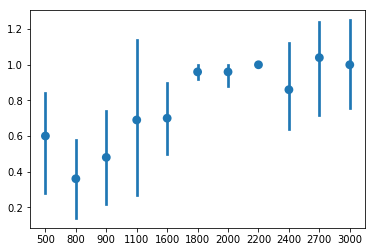

In [71]:
list_y = []
array_x = df["S"].values
array_y = df["value"].values

sns.pointplot(x=array_x, y=array_y, join=False)

In [65]:
def power_low(x,c,k):
    return c*(x**k)

In [80]:
param, cov = curve_fit(power_low, df["S"].values, df["value"].values)
print("c=",param[0])
print("k=",param[1])

c= 0.0219776681327442
k= 0.4831332447711093


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


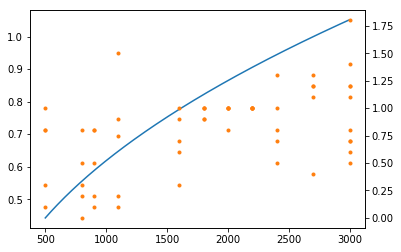

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
list_y = []
axis_x = np.arange(500,3000,10)

for num in axis_x:
    list_y.append( param[0]*(num**param[1]) )


ln1=ax1.plot(axis_x, np.array(list_y).reshape(-1),'C0')

ax2 = ax1.twinx()
ln2=ax2.plot(array_x,array_y,'C1',marker=".",linestyle='None')


statsmodelでOLSでべき乗そくをフィッティング

In [101]:
data = df.loc[df["value"] != 0,:] #logとるので0を除く
formula = 'np.log(value) ~ np.log(S)'
results = smf.ols(formula, data=data).fit()

In [102]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     19.33
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           4.86e-05
Time:                        12:28:04   Log-Likelihood:                -50.512
No. Observations:                  59   AIC:                             105.0
Df Residuals:                      57   BIC:                             109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7990      1.013     -4.739      0.0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


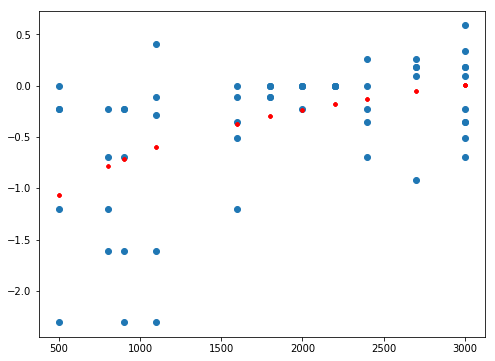

In [110]:
#yがlogスケールのプロット
x = data["S"]
y = data["value"]


ig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, np.log(y), 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS",linestyle='None')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


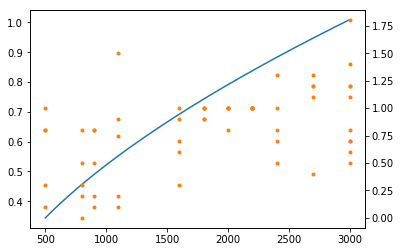

In [115]:
#ｙを元のスケールに戻してプロット
results.params
fig = plt.figure()
ax1 = fig.add_subplot(111)
list_y = []
axis_x = np.arange(500,3000,10)

for num in axis_x:
    list_y.append(math.e**results.params[0]*(num**results.params[1]) )


ln1=ax1.plot(axis_x, np.array(list_y).reshape(-1),'C0')

ax2 = ax1.twinx()
ln2=ax2.plot(array_x,array_y,'C1',marker=".",linestyle='None')